### outliers and its treatment
QUE -How to detect outliers?
=> Using boxplot to detect outliers

In [109]:
salary = [11,40,45,68,65,68,78,90,57,74,91,92,88,68,57,48,99,101,68,77,110,149]

In [110]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [111]:
# Five point summary - (quantile summary) & percentile > [0,0.25,0.50,0.75,1]
np.quantile(salary,[0, 0.25, 0.50, 0.75, 1])

array([ 11.  ,  59.  ,  71.  ,  90.75, 149.  ])

In [112]:
df = pd.DataFrame(salary, columns = ['Salary'])

In [113]:
df.describe()

,Salary
count,22.000000
mean,74.727273
std,28.282894
min,11.000000
25%,59.000000
50%,71.000000
75%,90.750000
max,149.000000


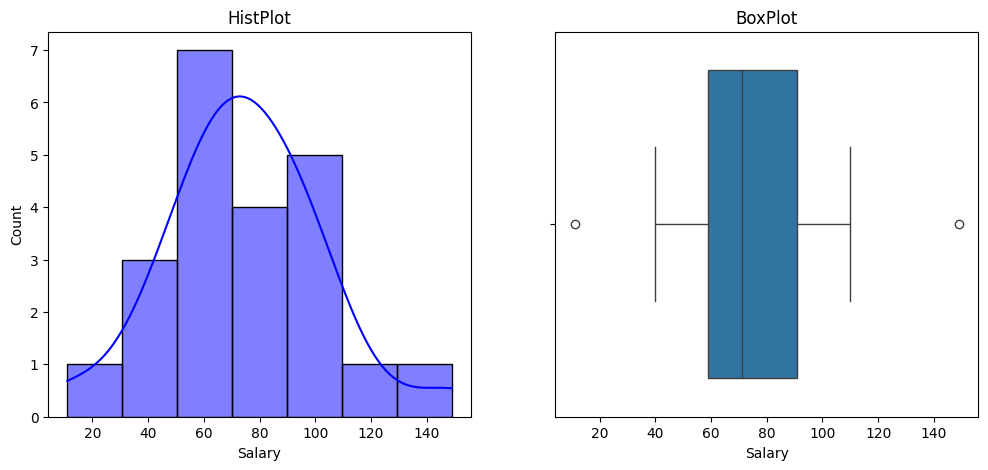

In [114]:
# To check the outliers > boxplot and distplot or histplot

plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
sns.histplot(df['Salary'], kde= True, color = 'blue')
plt.title("HistPlot")

plt.subplot(1,2,2)
sns.boxplot(x = df['Salary']) # sns.boxplot(data = df, y  = 'Salary)
plt.title("BoxPlot")

plt.show()

In [115]:
# outliers treatment

# (a) Dropping the outliers.
# (b) Capping the outliers.
# (c) Replacing with mean and median or any constant value.
# (d) Scaling and transformaion.

In [116]:
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)

In [117]:
Q1

59.0

In [118]:
Q3

90.75

### Calculating Lower and Upper Fence

In [119]:
IQR = Q3-Q1

In [120]:
lower_fence = Q1-1.5*IQR
upper_fence = Q3+1.5*IQR

In [121]:
lower_fence # Value is lower than lower_fence is outlier

11.375

In [122]:
upper_fence # Value is upper than higher fence is outlier

138.375

In [123]:
df.shape

(22, 1)

### (a). Dropping the outlier

In [124]:
# Dropping the outlier >> note don't do without consulting our business team
df_filtered = df[(df.Salary >= lower_fence) & (df.Salary <= upper_fence)]

In [125]:
df_filtered

,Salary
1,40
2,45
3,68
4,65
5,68
6,78
7,90
8,57
9,74
10,91


In [126]:
df_filtered.shape

(20, 1)

### If you check again outlier so chances of there is showing outlier again due changing in data.

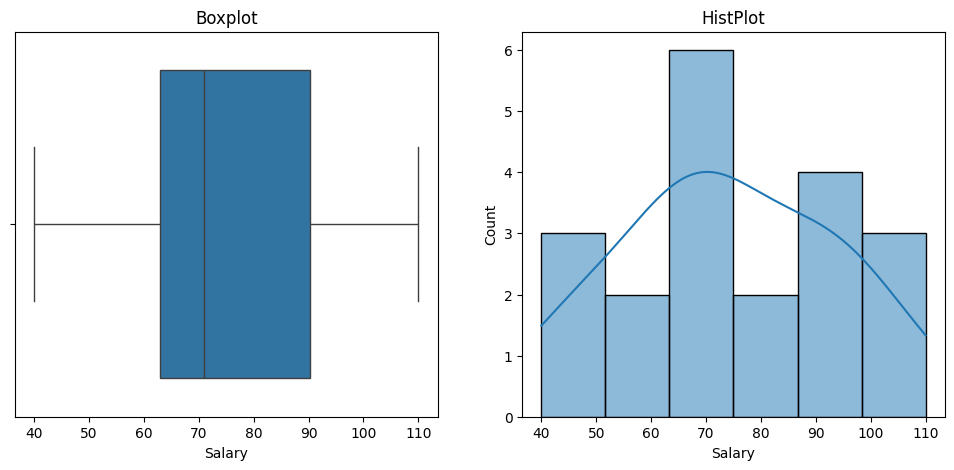

In [127]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(x = df_filtered['Salary'])
plt.title("Boxplot")

plt.subplot(1,2,2)
sns.histplot(df_filtered['Salary'],kde = True)
plt.title("HistPlot")

plt.show()

### (b). Replacing with mean and median

In [128]:
#                                   when salary grater than or equal & lower than or equal  salary mean put in Salary column         
df['Salary_mean_imputed'] = np.where((df.Salary >= upper_fence) | (df.Salary <= lower_fence), df['Salary'].mean(), df['Salary'])

In [129]:
df

,Salary,Salary_mean_imputed
0,11,74.727273
1,40,40.000000
2,45,45.000000
3,68,68.000000
4,65,65.000000
5,68,68.000000
6,78,78.000000
7,90,90.000000
8,57,57.000000
9,74,74.000000


### (c). Capping the outlier (Replacing with nearest value that not outlier)

In [130]:
# capping >> replacing the value with neearest value that is not outlier

In [131]:
lower_cap =  df['Salary'].quantile(0.05)
upper_cap = df['Salary'].quantile(0.95)

In [132]:
lower_cap

40.25

In [133]:
upper_cap

109.55

In [146]:
df['Salary_capped'] = np.where(df['Salary'] < lower_cap, lower_cap, # Where salary less than lower cap put in lower cap
        np.where(df['Salary'] > upper_cap, upper_cap, df['Salary'])) # Where salary higher than upper cap put in upper cap

In [145]:
df

,Salary,Salary_mean_imputed,Salary_capped
0,11,74.727273,40.25
1,40,40.000000,40.25
2,45,45.000000,45.00
3,68,68.000000,68.00
4,65,65.000000,65.00
5,68,68.000000,68.00
6,78,78.000000,78.00
7,90,90.000000,90.00
8,57,57.000000,57.00
9,74,74.000000,74.00
